# Projeto de Séries Temporais
## Chuvas no município de São Paulo
### João Honorato, Maria Raquel

Estamos usando dados mensais de precipitação de chuva no município de São Paulo, extraídos do Departamento de Águas e Energia Elétrica (DAEE), do período de 1985 a 2022 

link: http://www.hidrologia.daee.sp.gov.br/

A chuva é medida em milímetros, 1 mm de altura de chuva equivale ao volume de 1 litro precipitado sobre uma superfície de 1 m² de área.

As alturas mensais de chuva são as acumuladas entre 7 horas do último dia do mês anterior até às 7 horas do último dia do mês considerado.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### Carregando e tratando os dados

In [2]:
# Carregando os dados

chuvasp = pd.read_csv('E3-262_Chuva_Mensal_Serie_20230830_084446.csv', sep=';')
chuvasp.head()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,1985,"184,90","242,90","230,00","59,00","126,20","14,60","4,00","21,80","126,10","71,10","111,30","155,20"
1,1986,"199,60","221,00","218,70","106,50","113,10","3,90","30,30",---,"34,50","60,70","242,50","389,90"
2,1987,"525,80",---,"161,30","98,10","293,80","183,90","11,80","30,90","80,20","84,80","72,70","152,10"
3,1988,"268,70","224,40","189,20","175,10","224,90","58,60","1,30","0,20","28,40","173,90","100,20","289,80"
4,1989,"312,90","344,30","288,20","66,30","21,70","52,50","150,10","32,90","52,10","80,10","88,00","236,70"


In [3]:
# Precisamos substituir as vírgulas por pontos para converter os valores para float

chuvasp = chuvasp.replace(',','.', regex=True)
chuvasp.head()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,1985,184.90,242.90,230.00,59.00,126.20,14.60,4.00,21.80,126.10,71.10,111.30,155.20
1,1986,199.60,221.00,218.70,106.50,113.10,3.90,30.30,---,34.50,60.70,242.50,389.90
2,1987,525.80,---,161.30,98.10,293.80,183.90,11.80,30.90,80.20,84.80,72.70,152.10
3,1988,268.70,224.40,189.20,175.10,224.90,58.60,1.30,0.20,28.40,173.90,100.20,289.80
4,1989,312.90,344.30,288.20,66.30,21.70,52.50,150.10,32.90,52.10,80.10,88.00,236.70


In [4]:
# De acordo com o DAEE, valores com '---' representam dados inexistentes.
# Vamos substituí-los pela de chuvas de cada mês, dado presente na última linha do dataset

chuvasp.tail()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
34,2019,---,315.50,318.50,172.30,97.30,59.00,195.10,6.70,73.70,75.90,170.80,249.00
35,2020,408.10,363.00,95.50,5.60,13.70,163.80,10.20,62.10,22.90,213.90,162.10,---
36,2021,373.30,174.10,137.80,55.70,38.50,15.50,38.00,44.80,---,152.80,108.20,247.40
37,2022,418.40,136.30,233.60,40.40,67.30,45.90,8.80,35.20,131.30,117.30,197.70,200.40
38,Média:,309.01,249.32,228.13,92.24,84.89,58.09,51.79,28.56,85.08,139.63,145.48,235.36


In [5]:
for coluna, i in zip(chuvasp.columns, range(14)):
    chuvasp[coluna] = chuvasp[coluna].str.replace('---', f'{chuvasp.iloc[-1][i]}')

chuvasp.tail()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
34,2019,309.01,315.50,318.50,172.30,97.30,59.00,195.10,6.70,73.70,75.90,170.80,249.00
35,2020,408.10,363.00,95.50,5.60,13.70,163.80,10.20,62.10,22.90,213.90,162.10,235.36
36,2021,373.30,174.10,137.80,55.70,38.50,15.50,38.00,44.80,85.08,152.80,108.20,247.40
37,2022,418.40,136.30,233.60,40.40,67.30,45.90,8.80,35.20,131.30,117.30,197.70,200.40
38,Média:,309.01,249.32,228.13,92.24,84.89,58.09,51.79,28.56,85.08,139.63,145.48,235.36


In [6]:
valores_medios = chuvasp.iloc[-1][1:].values.astype(float)
valores_medios

array([309.01, 249.32, 228.13,  92.24,  84.89,  58.09,  51.79,  28.56,
        85.08, 139.63, 145.48, 235.36])

In [7]:
# Excluiremos a última linha
chuvasp = chuvasp.drop(chuvasp[chuvasp['Ano'] == '  Média:'].index)

chuvasp.tail()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
33,2018,238.20,84.50,228.13,66.40,25.80,15.00,20.50,28.56,72.90,203.40,134.10,258.00
34,2019,309.01,315.50,318.50,172.30,97.30,59.00,195.10,6.70,73.70,75.90,170.80,249.00
35,2020,408.10,363.00,95.50,5.60,13.70,163.80,10.20,62.10,22.90,213.90,162.10,235.36
36,2021,373.30,174.10,137.80,55.70,38.50,15.50,38.00,44.80,85.08,152.80,108.20,247.40
37,2022,418.40,136.30,233.60,40.40,67.30,45.90,8.80,35.20,131.30,117.30,197.70,200.40


In [8]:
# Excluiremos a coluna ano
chuvasp = chuvasp.drop(columns=['Ano'])

chuvasp.head()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,184.90,242.90,230.00,59.00,126.20,14.60,4.00,21.80,126.10,71.10,111.30,155.20
1,199.60,221.00,218.70,106.50,113.10,3.90,30.30,28.56,34.50,60.70,242.50,389.90
2,525.80,249.32,161.30,98.10,293.80,183.90,11.80,30.90,80.20,84.80,72.70,152.10
3,268.70,224.40,189.20,175.10,224.90,58.60,1.30,0.20,28.40,173.90,100.20,289.80
4,312.90,344.30,288.20,66.30,21.70,52.50,150.10,32.90,52.10,80.10,88.00,236.70


In [9]:
# Convertendo os valores para float

chuvasp = chuvasp.astype(float)

In [10]:
valores = list(chuvasp.values.flatten())
print(valores)

[184.9, 242.9, 230.0, 59.0, 126.2, 14.6, 4.0, 21.8, 126.1, 71.1, 111.3, 155.2, 199.6, 221.0, 218.7, 106.5, 113.1, 3.9, 30.3, 28.56, 34.5, 60.7, 242.5, 389.9, 525.8, 249.32, 161.3, 98.1, 293.8, 183.9, 11.8, 30.9, 80.2, 84.8, 72.7, 152.1, 268.7, 224.4, 189.2, 175.1, 224.9, 58.6, 1.3, 0.2, 28.4, 173.9, 100.2, 289.8, 312.9, 344.3, 288.2, 66.3, 21.7, 52.5, 150.1, 32.9, 52.1, 80.1, 88.0, 236.7, 284.1, 196.9, 310.1, 85.8, 77.9, 50.6, 121.2, 76.3, 97.2, 206.8, 116.3, 149.8, 330.7, 340.3, 522.4, 200.3, 43.3, 96.8, 28.2, 37.3, 101.4, 168.0, 67.3, 237.9, 129.2, 258.5, 228.13, 87.2, 93.5, 11.6, 40.9, 24.7, 150.6, 219.6, 145.48, 211.7, 221.5, 225.7, 110.0, 84.6, 133.9, 74.7, 11.2, 40.8, 210.1, 134.1, 125.5, 170.5, 196.9, 184.4, 231.6, 111.4, 54.9, 30.5, 39.2, 2.4, 1.8, 147.6, 86.6, 276.3, 373.8, 383.1, 267.7, 73.9, 79.7, 31.2, 46.8, 1.5, 44.2, 202.6, 115.1, 235.36, 334.3, 376.5, 284.5, 42.3, 21.7, 45.1, 12.2, 41.2, 179.4, 179.8, 87.4, 243.9, 235.0, 187.6, 57.1, 63.2, 88.2, 124.7, 12.5, 28.8, 118.0,

In [11]:
anos = pd.date_range('1985', periods = len(valores), freq = 'M')
anos

DatetimeIndex(['1985-01-31', '1985-02-28', '1985-03-31', '1985-04-30',
               '1985-05-31', '1985-06-30', '1985-07-31', '1985-08-31',
               '1985-09-30', '1985-10-31',
               ...
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', length=456, freq='M')

In [12]:
serie = pd.Series(valores, index = anos)
serie

1985-01-31    184.9
1985-02-28    242.9
1985-03-31    230.0
1985-04-30     59.0
1985-05-31    126.2
              ...  
2022-08-31     35.2
2022-09-30    131.3
2022-10-31    117.3
2022-11-30    197.7
2022-12-31    200.4
Freq: M, Length: 456, dtype: float64

In [13]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov','Dez']
serie_medias = pd.Series(valores_medios, index = meses)
serie_medias

Jan    309.01
Fev    249.32
Mar    228.13
Abr     92.24
Mai     84.89
Jun     58.09
Jul     51.79
Ago     28.56
Set     85.08
Out    139.63
Nov    145.48
Dez    235.36
dtype: float64

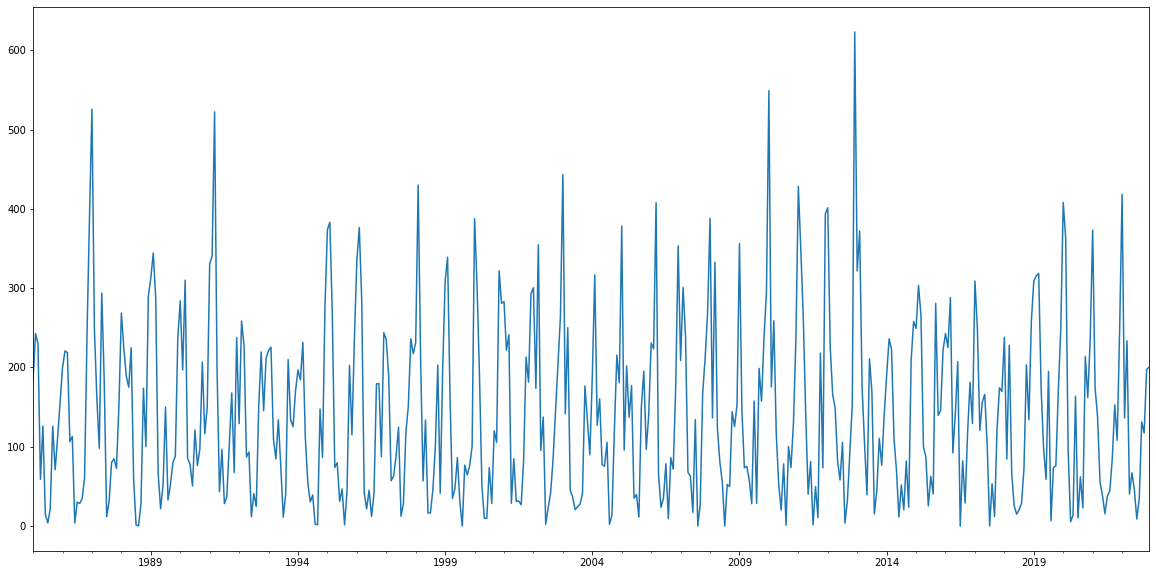

In [19]:
plt.rcParams['figure.figsize'] = (20, 10)
serie.plot();

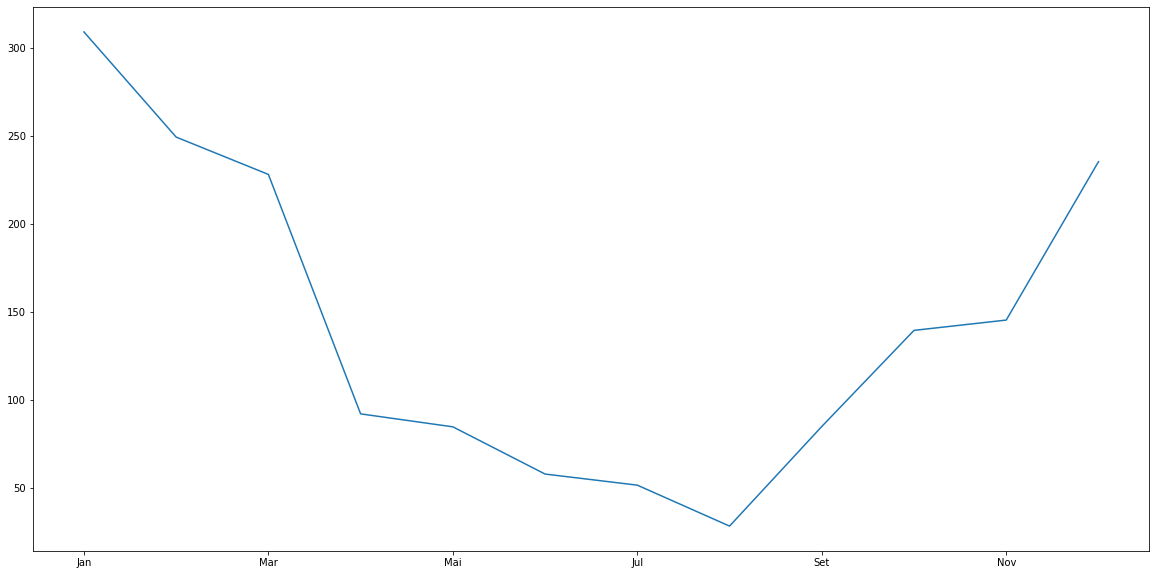

In [22]:
serie_medias.plot();

### Média móvel

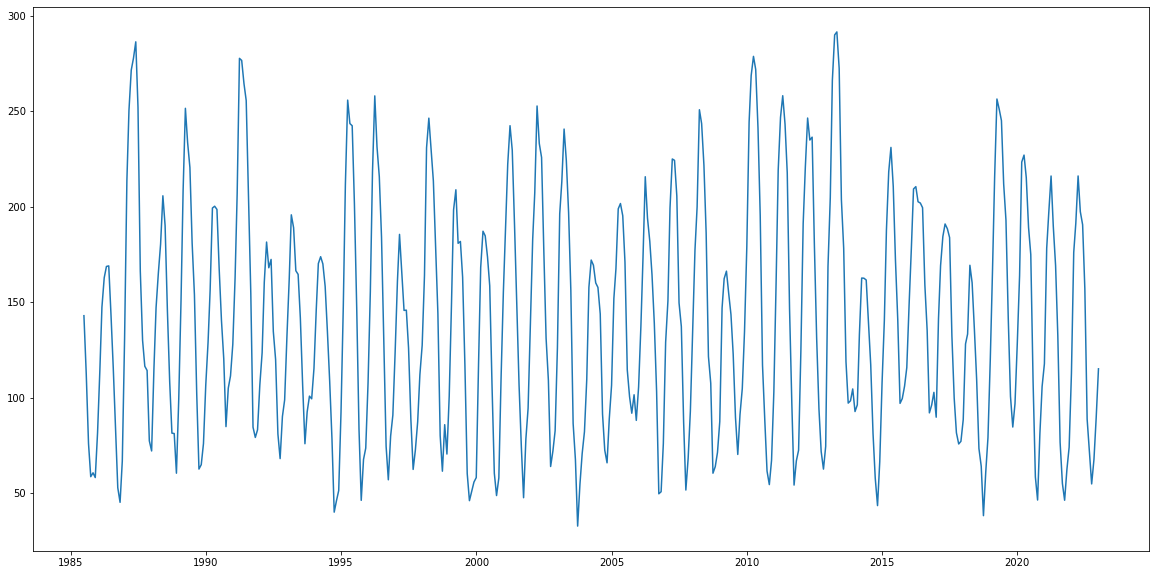

In [23]:
media_movel = serie.rolling(window = 6)
media_movel = media_movel.mean()
plt.plot(media_movel);

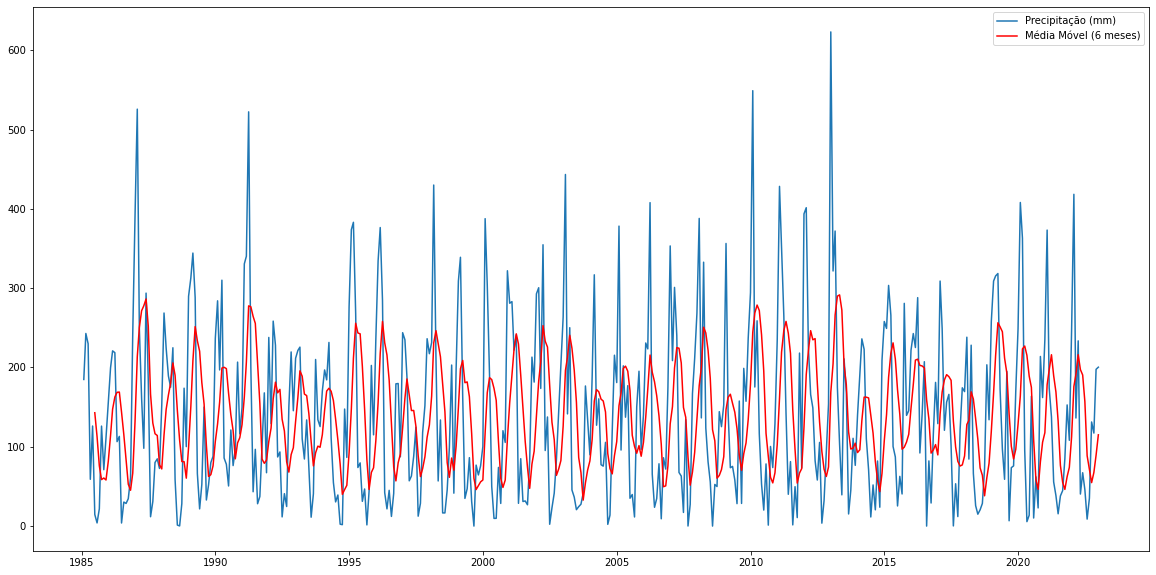

In [24]:
plt.plot(serie, label = 'Precipitação (mm)')
plt.plot(media_movel,color='red', label='Média Móvel (6 meses)')
plt.legend(loc='best')
plt.show()

### Decomposição

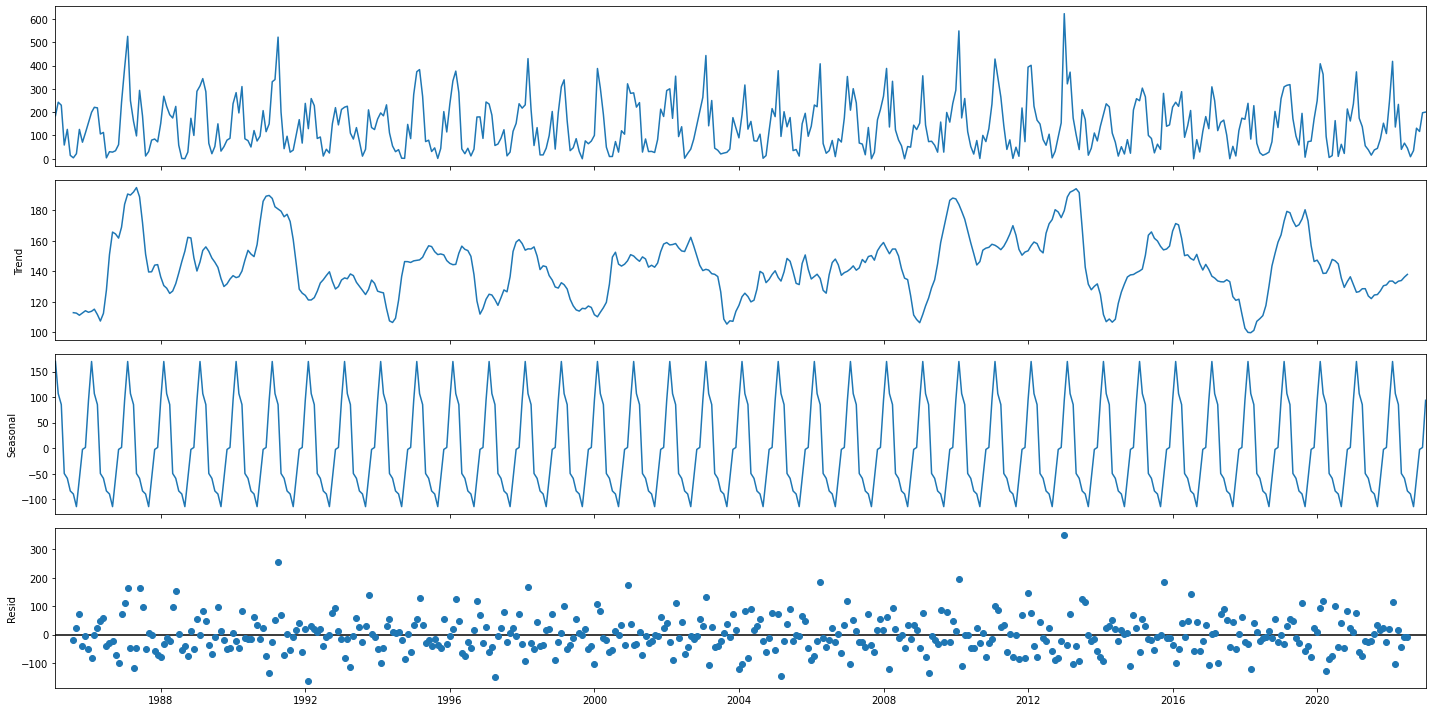

In [25]:
decomposicao = seasonal_decompose(serie)
decomposicao.plot();